# Imports and define expectation func

In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from FittedModels.utils import plot_distributions, plot_samples, plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution, expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.MoG import MoG
from TargetDistributions.MoG import custom_MoG

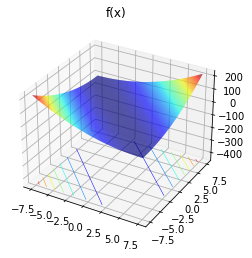

In [3]:
expectation_func_fig = plot_func2D(expectation_function, n_points=200, range=15)

# Lumpy Flow Target Distribution

In [4]:
torch.set_default_dtype(torch.float64)

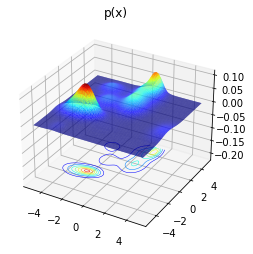

In [5]:
torch.manual_seed(0) # 0 breaks it within 1000 epochs
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=6)
fig = plot_distribution(target, bounds=[[-10, 10], [-10, 10]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

# DReG, alpha=2

In [6]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=5, scaling_factor=4.0) #, flow_type="RealNVP")
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [7]:
learnt_sampler.sample((1,)).dtype, target.log_prob(learnt_sampler.sample((1,))).dtype

(torch.float64, torch.float64)

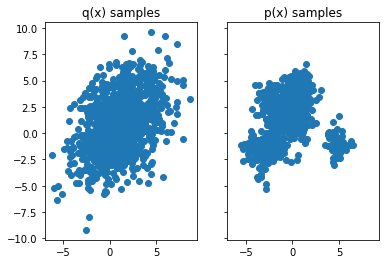

In [8]:
samples_fig_before = plot_samples(tester)

In [9]:
history = tester.train(10000, batch_size=int(1e3), clip_grad=True, max_grad_norm=1)

loss: -0.6433202680486121, mean log p_x -5.612216233481468: 100%|████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:59<00:00, 18.53it/s]


In [10]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 14.437952185024466 
estimate before training is 14.148081307218085 
estimate after training is 14.401988385943177 
effective sample size before is 2348.2172062872205 out of 10000
effective sample size after train is 6112.829937813091  out of 10000
variance in weights is 6.359671146780709e-09


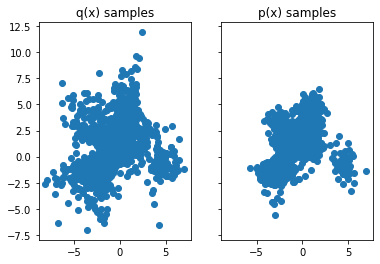

In [11]:
samples_fig_after = plot_samples(tester)

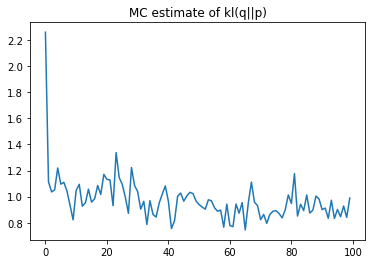

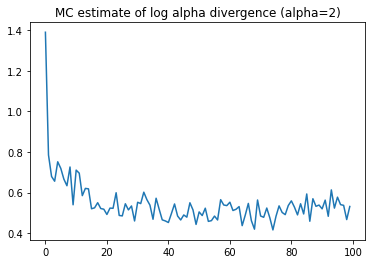

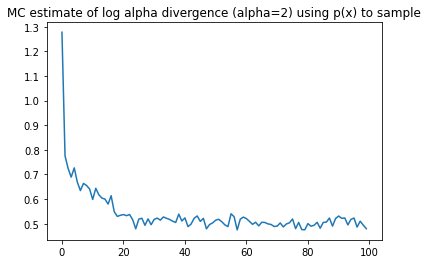

In [12]:
plot_divergences(history)

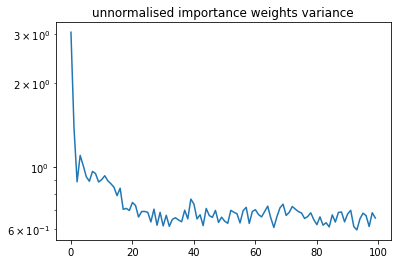

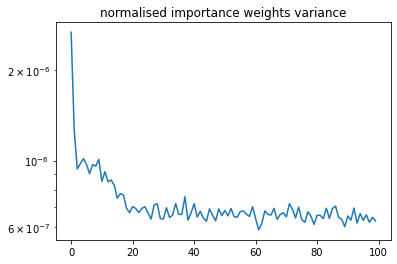

In [13]:
plot_sampling_info(history)

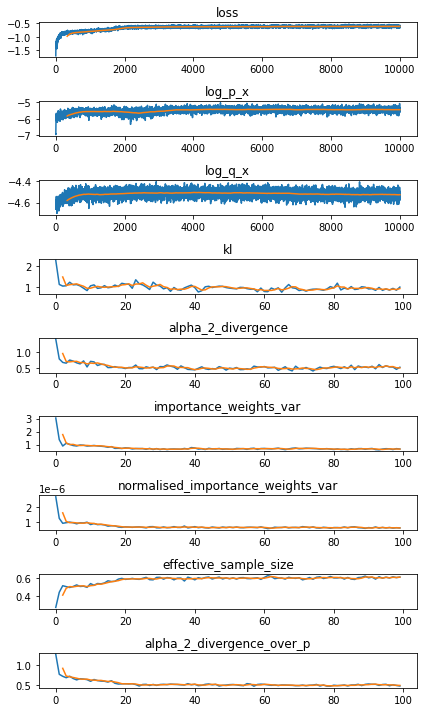

In [14]:
hist_plot = plot_history(history)

# KL

In [27]:
torch.set_default_dtype(torch.float64)

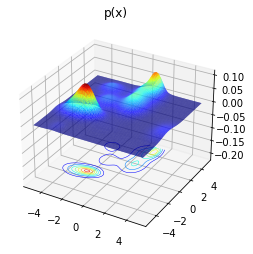

In [28]:
torch.manual_seed(0)
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

In [29]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=5, scaling_factor=4.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

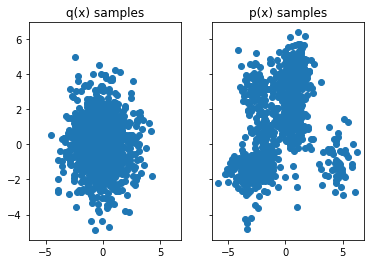

In [30]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(10000, batch_size=int(1e3)) #, clip_grad=True, max_grad_norm=1) 
# 6418 ESS with clipping

loss: 0.1468320390314157, mean log p_x -3.7765917750308904:  29%|███████████████████████▏                                                         | 2860/10000 [01:40<04:22, 27.22it/s]

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
hist_plot = plot_history(history)

# OLD - testing different effects on DReG stability (e.g. clipping, numerical precision etc)

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=4.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
# breaks after 1500 epoch
history = tester.train(1500, batch_size=int(1e2))

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
hist_plot = plot_history(history)

# Increase Batch Size
Makes it happy

In [ ]:
torch.manual_seed(0)
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=4.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(10000, batch_size=int(1e3))

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
fig_hist = plot_history(history)

# Increase the precision

In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
torch.manual_seed(3)
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=2.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(2000, batch_size=int(1e2))

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
plot_history(history)

# Gradient Norm Clip
This helps!

In [ ]:
torch.manual_seed(0) # 0 breaks it within 1000 epochs
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=4.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(20000, batch_size=int(1e2), clip_grad=True, max_grad_norm=1)

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
hist_plot = plot_history(history)

# Lower the learning rate
Helps, but slows down learning, and seems like it makes the algorithm more likely to stay overly smooth

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=2.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG", lr=1e-4)
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(40000, batch_size=int(1e2))

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
hist_fig = plot_history(history)

# Combo

In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
torch.manual_seed(0)
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))

In [ ]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=5, scaling_factor=4.0)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
learnt_sampler.sample((1,)).dtype, target.log_prob(learnt_sampler.sample((1,))).dtype

In [ ]:
samples_fig_before = plot_samples(tester)

In [ ]:
history = tester.train(10000, batch_size=int(1e3), clip_grad=True, max_grad_norm=1)

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
samples_fig_after = plot_samples(tester)

In [ ]:
plot_divergences(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
hist_plot = plot_history(history)

# New Section